In [74]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc

In [91]:
data = pd.read_csv(r'C:\Users\JuuPumal\Downloads\Test\Masinõpe\df_with_features.csv', sep=';')

Approach 1: I applied PCA to the features, to avoid the curse of dimensionality and then used KMeans and HDBS to cluster homeworks. The clustering was done for each task separately, to avoid clusters correlating to homework tasks(which would defeat the point of clustering). 

For this task, KMeans appeared to outperform HDBS by a significant margin, therefore, it was selected as the source of the labels. Granted, actual accuracy could not be assessed, as validation data does not exist, but the differnece was evident from a cursory glance at the graph.

There were no training/validation sets, as the task did not require them, nor was there any way of validating labels/clusters. In essence, since validating results was not feasible, all of the data is in the test set.

In theory, it would be possible to manually construct a validation set by adding extra data(imitating a cheating student, by copying off existing programs in the dataset), however the amount of work required would be beyond the scope of this project, not to mention the fact that to avoid false negatives in the label, the set chosen as the basis for the validation set would still need to be evaluated manually.

The output of the program below is a dataframe with 3 columns: 1. and 2. for each student in a pair and 3. that represents the amount of times the student pair appeared in the same cluster. The maximum possible value of the latter is 33, and the maximum value that appeared in clustering was 17.



In [214]:
testdata11 = data[(data["Kodutöö"] == "K01") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata21 = data[(data["Kodutöö"] == "K02") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata22 = data[(data["Kodutöö"] == "K02") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)
testdata23 = data[(data["Kodutöö"] == "K02") & (data["Ülesanne"] == "kodu4.py")].copy(deep=True)
testdata31 = data[(data["Kodutöö"] == "K03") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata32 = data[(data["Kodutöö"] == "K03") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata33 = data[(data["Kodutöö"] == "K03") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)
testdata34 = data[(data["Kodutöö"] == "K03") & (data["Ülesanne"] == "kodu4.py")].copy(deep=True)
testdata41 = data[(data["Kodutöö"] == "K04") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata42 = data[(data["Kodutöö"] == "K04") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata43 = data[(data["Kodutöö"] == "K04") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)
testdata51 = data[(data["Kodutöö"] == "K05") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata52 = data[(data["Kodutöö"] == "K05") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata53 = data[(data["Kodutöö"] == "K05") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)
testdata71 = data[(data["Kodutöö"] == "K07") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata72 = data[(data["Kodutöö"] == "K07") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata73 = data[(data["Kodutöö"] == "K07") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)
testdata81 = data[(data["Kodutöö"] == "K08") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata82 = data[(data["Kodutöö"] == "K08") & (data["Ülesanne"] == "film.py")].copy(deep=True)
testdata83 = data[(data["Kodutöö"] == "K08") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)
testdata91 = data[(data["Kodutöö"] == "K09") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata92 = data[(data["Kodutöö"] == "K09") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata101 = data[(data["Kodutöö"] == "K10") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata102 = data[(data["Kodutöö"] == "K10") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata111 = data[(data["Kodutöö"] == "K11") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata112 = data[(data["Kodutöö"] == "K11") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata131 = data[(data["Kodutöö"] == "K13") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata132 = data[(data["Kodutöö"] == "K13") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata141 = data[(data["Kodutöö"] == "K14") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata142 = data[(data["Kodutöö"] == "K14") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata151 = data[(data["Kodutöö"] == "K15") & (data["Ülesanne"] == "kodu1.py")].copy(deep=True)
testdata152 = data[(data["Kodutöö"] == "K15") & (data["Ülesanne"] == "kodu2.py")].copy(deep=True)
testdata153 = data[(data["Kodutöö"] == "K15") & (data["Ülesanne"] == "kodu3.py")].copy(deep=True)

In [216]:
andmekogud = [testdata11, testdata21, testdata22, testdata23, testdata31, testdata32, testdata33, testdata34, testdata41, testdata42, testdata43, testdata51, testdata52, testdata53, testdata71, testdata72, testdata73, testdata81, testdata82, testdata83, testdata91, testdata92, testdata101, testdata102, testdata111, testdata112, testdata131, testdata132, testdata141, testdata142, testdata151, testdata152, testdata153]

In [249]:
len(andmekogud)

33

In [218]:
for testdata in andmekogud:
    testdata.dropna(inplace=True)
scaler = StandardScaler()


In [255]:
for testdata in andmekogud:
    scaleddata = scaler.fit_transform(testdata.iloc[:,5:35])
    pca_2 = PCA(n_components=2)
    rezza = pca_2.fit_transform(scaleddata)
    testdata["PCA2"] = rezza.tolist()
    testdata["PCA1"] = testdata["PCA2"].apply(lambda x: x[0])
    testdata["PCA2"] = testdata["PCA2"].apply(lambda x: x[1])



In [203]:
testdata

,Kodutöö,Õpilane,Ülesanne,Tekst,commented_lines,blank_lines,code_lines,characters_per_line,class_definitions,function_definitions,...,if_statements,elif_statements,else_statements,try_statements,except_statements,with_statements,not_statements,while_loops,for_loops,PCA2
3666,K05,S001,kodu3.py,"def moos(suur, vaike, maht):\n karp = 0\n while suur > 0:\n if maht >= 5:\n maht -= 5\n suur -= 1\n karp += 1\n else:\n break\n while vaike > 0:\n if maht >= 1:\n maht -= 1\n vaike -= 1\n karp += 1\n else:\n break\n if maht == 0:\n return karp\n else:\n return -1\n",0.0,0.0,21.0,18.761905,0.0,1.0,...,3.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,"[-1.0254807010874656, 1.8330353274531905]"
3669,K05,S002,kodu3.py,"def moos(s, v, k):\n karp = 0\n for i in range(s):\n if k-5>=0:\n karp += 1\n k -= 5\n if k<=v:\n karp += k\n else:\n karp = -1\n return karp\n\nprint(moos(2,6,14))",0.0,1.0,12.0,16.153846,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,"[-1.4318037634096923, -0.4656734514788353]"
3672,K05,S003,kodu3.py,"\ndef moos(suuredkarbid, väiksedkarbid, moosikogus):\n karpidearv = 0\n if moosikogus <= 0:\n return 0\n if moosikogus >= 5:\n for i in range(suuredkarbid):\n moosikogus -= 5\n karpidearv += 1\n if moosikogus <= 0:\n return karpidearv\n if moosikogus < 5:\n break\n for i in range(väiksedkarbid):\n moosikogus -= 1\n karpidearv += 1\n if moosikogus == 0:\n return karpidearv\n return -1",0.0,0.0,19.0,26.473684,0.0,1.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"[-1.157626814874686, 0.08771602332130707]"
3675,K05,S004,kodu3.py,"def moos(a,b,c):\n loendur=0\n for x in range(a):\n if c>=5:\n c=c-5\n loendur+=1\n for x in range(b):\n if c>=1:\n c=c-1\n loendur+=1\n if c>0:\n return(-1)\n return(loendur)\n",0.0,0.0,14.0,17.428571,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,"[-1.33210656113934, -0.6554697555607282]"
3678,K05,S006,kodu3.py,"def moos(suurte_arv, väikeste_arv, kaal):\n karbid_kokku = 0\n while (kaal - 5) >= 0 and suurte_arv > 0:\n kaal -= 5\n suurte_arv -= 1\n karbid_kokku += 1\n if suurte_arv <= 0:\n break\n while (kaal - 1) >= 0:\n kaal -= 1\n väikeste_arv -= 1\n karbid_kokku += 1\n if väikeste_arv <= 0 and kaal > 0:\n karbid_kokku = -1\n break\n return(karbid_kokku)\nsuurte_arv =0\nväikeste_arv =10\nkaal = 7\n\nmoos(suurte_arv, väikeste_arv, kaal)\nprint(moos(suurte_arv, väikeste_arv, kaal))\n \n \n",0.0,1.0,24.0,23.240000,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,"[-0.3813189924638937, 1.4415443880636922]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,K05,S373,kodu3.py,"def moos(x, y, z):\n kasutatud = 0\n while x > 0 and z >= 5:\n z -= 5\n x -= 1\n kasutatud += 1\n while y > 0 and z > 0:\n z -= 1\n y -= 1\n kasutatud += 1\n if z == 0:\n return kasutatud\n else:\n return -1\nx = int(input(""Sisestage suurte karpide kogus: ""))\ny = int(input(""Sisestage väikeste karpide kogus: ""))\nz = int(input(""Sisestage moosi kogus: ""))\nprint(moos(x, y, z))",0.0,0.0,18.0,24.000000,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,"[-0.5332199350246217, 1.2711372302264534]"
4626,K05,S374,kodu3.py,"def moos(suur, vaike, moosikogus):\n karpidearv=0\n if moosikogus>=5:\n karpidearv+=min(moosikogus//5, suur)\n moosikogus-=5*(karpidearv)\n if moosikogus<=vaike:\n karpidearv+=moosikogus\n moosikogus-=moosikogus\n if moosikogus!=0:\n return(-1)\n return(karpidearv)\n",0.0,0.0,12.0,25.500000,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[-1.2318244016013895, -0.014404818817627589]"
4629,K05,S375,kodu3.py,"def moos(x, y, z):\n b = 0\n while x > 0 and z >= 5:\n z -= 5\n x-= 1\n b += 1\n while y > 0 and z > 0:\n z -= 1\n y -= 1\n b += 1\n if z != 0:\n b = -1\n return(b)\n",0.0,0.0,14.0,15.500000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,"[-1.6817752257187244, 1.6714460441030459]"
4632,K05,S376,kodu3.py,"def moos(suured_karbid, väiksed_karbid, kg):\n\n karbid_kasutusel = 0\n karbid_otsas = """"\n \n while kg >= 5 and suured_karbid > 0:\n kg -= 5\n karbid_kasutusel += 1\n suured_karbid -= 1\n \

In [189]:
import hdbscan as hdbs

In [256]:
for testdata in andmekogud:
    KM = KMeans(n_clusters=12, random_state=0).fit(testdata[["PCA1", "PCA2"]])
    print(KM.labels_)
    testdata["KM"] = KM.labels_

    HDBS = hdbs.HDBSCAN(min_cluster_size=3, metric='manhattan', cluster_selection_method='eom').fit(testdata[["PCA1", "PCA2"]])
    print(HDBS.labels_)
    testdata["HDBS"] = HDBS.labels_


[ 7  0  7 11  3  7  7  7  7  7  7  0  7  0  9  3  7  0  7  0  7  0  7  0
  7  7  7  7  0  7  0  8  0  8  7  7  7  7  7  7  7  7 11  7  7  7  0  0
  7  8  7  7  7  7  0  7  7  7  0  7  0  0  7  6  7  7  7  0  8  7  1  7
  7  7  7  6  7  0  7  7  6  7  7  0  7  0  7  7  0  7  7  7  7  0  7  7
  7  7  0 10  7  7  7  7  7  7  7  7  6  7  7  7  7  7  7  7  6  0  0  7
  7  7  7  7  0  7  7  7  7  8  0  7  7  0  3  7  0  7  6 11  7  6  0  7
  7  7 10  7  7  7  7  7  6  7  7  7  7  8  0  6  8  7 11  7 11  8  0  7
  0  7  6  6  7  7  2  7  9  7  7  7  7  7  7  7  7  3  7  0  0  0  7  7
  7  0  6  6 11  7  6  0  0  7  7  7  0  0  0  7  7  0  5  0  6  7  7  7
  6  0  0  7  0  7 11  0  6  7  0  7 11  7  7  6  7  6  7  7  0  7  7 11
  7  7  0  7  6  7  7  0  3  0  7  4  7  6  0  6  7  7  7  7  7  7  7  5
  7  7  0  7  7  7  7  0  7  7  7  7  7  6  7  7  3  0  0 11  0  7  7  8
  6  7  7  7  0  0  0  7  7  6  7  7  0  6  0 11  7  7  7  7  0 11  7 11
  7  7  7  0  7  7  0 11  7  6  7  8  0  7  7  7  0

In [257]:
def get_SUS(andmekogud):
    SUSdict = {}
    for df in andmekogud:
        for idx, i in df.iterrows():
            for idx, j in df.iterrows():
                if i["KM"] == j["KM"] and i["KM"] != -1 and i["Õpilane"] != j["Õpilane"] and (j["Õpilane"], i["Õpilane"]) not in SUSdict.keys():
                    SUSdict[(i["Õpilane"], j["Õpilane"])] = SUSdict.get((i["Õpilane"], j["Õpilane"]), 0) + 1
                else:
                    continue
    return SUSdict

In [258]:
sus = get_SUS(andmekogud)

In [268]:
suslist = []
for key, value in sus.items():
    if value > 0:
        suslist.append((key[0], key[1], value))
susdf = pd.DataFrame(suslist, columns=["Õpilane1", "Õpilane2", "Same-Cluster"])

In [269]:
susdf.sort_values(by="Same-Cluster", ascending=False)


,Õpilane1,Õpilane2,Same-Cluster
2270,S017,S188,17
9905,S075,S182,17
29070,S061,S119,17
1880,S013,S021,16
12649,S096,S232,16
...,...,...,...
7183,S054,S098,1
7184,S054,S099,1
20863,S186,S294,1
7185,S054,S100,1


Barplot of value counts in the final dataframe. X axis for amount of co-occurrences, Y axis for student pairs. This illustrates the increasing improbability of co-occurrence quite well in my opinion.

<AxesSubplot: xlabel='Same-Cluster'>

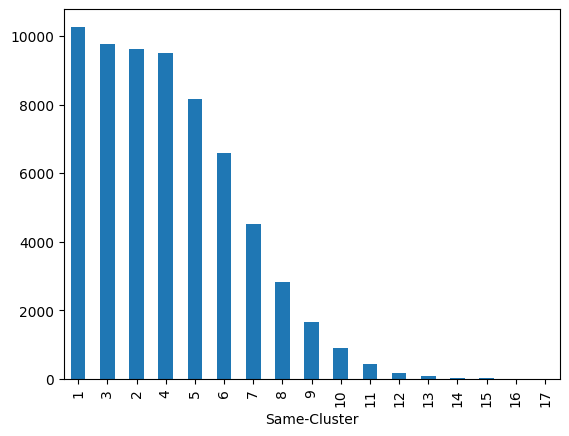

In [270]:
susdf.value_counts("Same-Cluster").plot(kind="bar")

Some random scatterplots I made for (I think) homework 8. The KMeans one could be used for illustration on the poster if needed, but it doesn't mean too much compared to the barplot.

<AxesSubplot: xlabel='PCA2', ylabel='PCA2'>

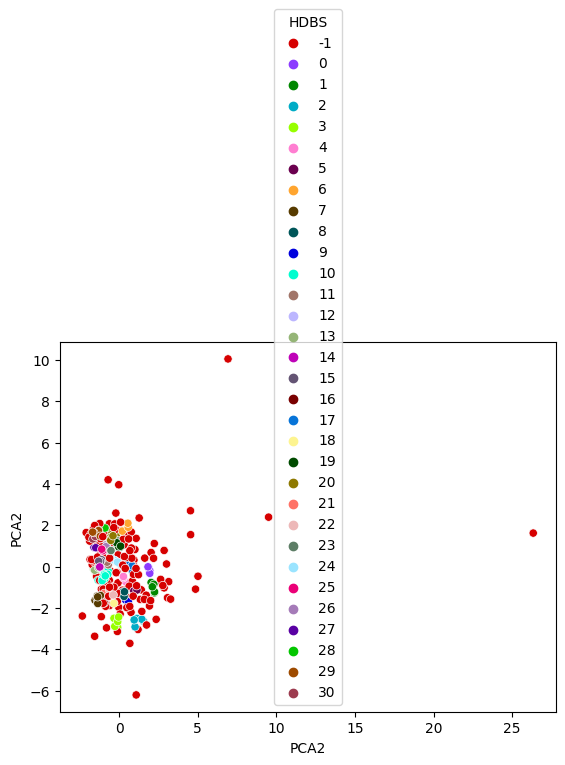

In [211]:
palette = sns.color_palette(cc.glasbey, n_colors=32)
sns.scatterplot(x=testdata["PCA2"].apply(lambda x: x[0]), y=testdata["PCA2"].apply(lambda x: x[1]), hue=testdata["HDBS"], palette = palette)

C:\Users\JuuPumal\AppData\Local\Temp\ipykernel_15532\3993541051.py:2: UserWarning: The palette list has more values (20) than needed (8), which may not be intended.
  sns.scatterplot(x=testdata["PCA2"].apply(lambda x: x[0]), y=testdata["PCA2"].apply(lambda x: x[1]), hue=testdata["KM"], palette = palette)


(-7.0, 6.0)

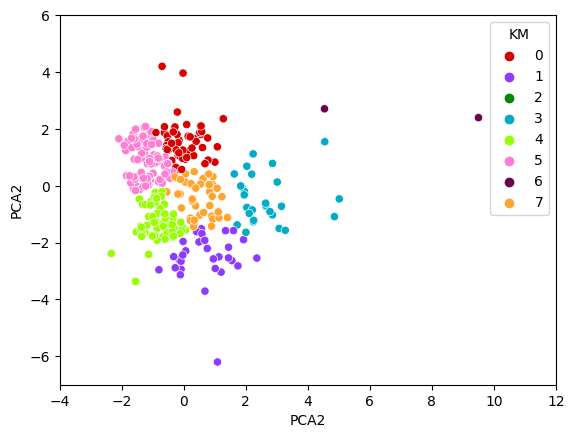

In [187]:
palette = sns.color_palette(cc.glasbey, n_colors=20)
sns.scatterplot(x=testdata["PCA2"].apply(lambda x: x[0]), y=testdata["PCA2"].apply(lambda x: x[1]), hue=testdata["KM"], palette = palette)
plt.xlim(-4, 12)
plt.ylim(-7, 6)
